In [1]:
import tarfile
import os
from math import *
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
from scipy.interpolate import interp1d

### Extraction

In [2]:
filter_conditions = {
    "p_p": "main1011_p_1H",
    "pip_p": "main1010_pip_1H",
    
    "p_O": "main1010_p_16O",
    "pip_O": "main1010_pip_16O",
    
    "p_N": "main1011_p_14N",
    "He_N": "main1011_4He_14N",
    "N_N": "main1011_14N_14N",
    "Fe_N": "main1011_56Fe_14N",
    
    "p_N_sNN": "main1011_sNN_p_14N",
    "He_N_sNN": "main1011_sNN_v2_4He_14N",
    "N_N_sNN": "main1011_sNN_v2_14N_14N",
    "Fe_N_sNN": "main1011_sNN_v2_56Fe_14N",
    
    "p_O_sNN": "main1011_sNN_p_16O",
    "pip_O_sNN": "main1011_sNN_pip_16O",
    "He_O_sNN": "main1011_sNN_v2_4He_16O",
    "N_O_sNN": "main1011_sNN_v2_14N_16O",
    "Fe_O_sNN": "main1011_sNN_v2_56Fe_16O",
    
    "p_Ar_sNN": "main1011_sNN_p_40Ar",
    "He_Ar_sNN": "main1011_sNN_v2_4He_40Ar",
    "N_Ar_sNN": "main1011_sNN_v2_14N_40Ar",
    "Fe_Ar_sNN": "main1011_sNN_v2_56Fe_40Ar"
}

In [3]:
def load_dataframes(paths):
    dataframes = {}
    for path in paths:
        file_list = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
        
        for file in file_list:
            try:
                df = pd.read_csv(file, delimiter='\t', header=None)
                dataframes[file] = df
            except pd.errors.EmptyDataError:
                print(f"Skipping file with no columns to parse: {file}")
            except Exception as e:
                print(f"Error reading {file}: {e}")
    
    return dataframes

def filter_dataframes(dataframes, conditions):
    filtered_dataframes = {}
    for label, keyword in conditions.items():
        filtered_dataframes[label] = {file: df for file, df in dataframes.items() if keyword in file}
    return filtered_dataframes

def extract_and_combine_data(filtered_dataframes):
    combined_dataframes = {}
    
    for label, dfs in filtered_dataframes.items():
        extracted_data = []
        
        for file, df in dfs.items():
            try:
                elab_plab = df.loc[df[0].isin(['elab', 'plab']), 1]
                if elab_plab.empty:
                    print(f"File {file} missing 'elab' or 'plab' row.")
                    continue
                
                sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
                err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
                
                extracted_df = pd.DataFrame({
                    'plab': [elab_plab.values[0]], 
                    'sig_inel': [sig_inel.values[0] if not sig_inel.empty else None],
                    'err_inel': [err_inel.values[0] if not err_inel.empty else None]
                })
                
                extracted_data.append(extracted_df)
            except Exception as e:
                print(f"Error processing {file}: {e}")
        
        if extracted_data:
            combined_dataframes[label] = pd.concat(extracted_data, ignore_index=True).sort_values(by='plab')
    
    return combined_dataframes


In [4]:
xsec_dat_paths = ['xsec_pythia8312', 'xsec_pythia8312_sNN']

dataframes = load_dataframes(xsec_dat_paths)
filtered_dataframes = filter_dataframes(dataframes, filter_conditions)
combined_dataframes = extract_and_combine_data(filtered_dataframes)

p_p_dataframe = combined_dataframes['p_p']
pip_p_dataframe = combined_dataframes['pip_p']

p_O_dataframe = combined_dataframes['p_O']
pip_O_dataframe = combined_dataframes['pip_O']

p_N_dataframe = combined_dataframes['p_N']
He_N_dataframe = combined_dataframes['He_N']
N_N_dataframe = combined_dataframes['N_N']
Fe_N_dataframe = combined_dataframes['Fe_N']

p_N_sNN_dataframe = combined_dataframes['p_N_sNN']
He_N_sNN_dataframe = combined_dataframes['He_N_sNN']
N_N_sNN_dataframe = combined_dataframes['N_N_sNN']
Fe_N_sNN_dataframe = combined_dataframes['Fe_N_sNN']

p_O_sNN_dataframe = combined_dataframes['p_O_sNN']
pip_O_sNN_dataframe = combined_dataframes['pip_O_sNN']
He_O_sNN_dataframe = combined_dataframes['He_O_sNN']
N_O_sNN_dataframe = combined_dataframes['N_O_sNN']
Fe_O_sNN_dataframe = combined_dataframes['Fe_O_sNN']

p_Ar_sNN_dataframe = combined_dataframes['p_Ar_sNN']
He_Ar_sNN_dataframe = combined_dataframes['He_Ar_sNN']
N_Ar_sNN_dataframe = combined_dataframes['N_Ar_sNN']
Fe_Ar_sNN_dataframe = combined_dataframes['Fe_Ar_sNN']

Exported datasets from Pythia 8.3.10 from jupyter notebook `pythi8310/Pythia8.3.10_cross_section_tables.ipynb`:

In [5]:
xs_p_O_py8310 = [326.561, 357.313, 397.736, 438.032, 484.021, 538.804, 612.224, 694.637, 796.673, 914.109]
xs_p_O_py8310_err = [0.208, 0.276, 0.340, 0.372, 0.340, 0.302, 0.028, 0.289, 0.282, 0.283]
xs_pip_O_py8310 = [261.857, 288.653, 331.384, 383.752, 426.441, 494.747, 555.011, 690.725, 810.340, 737.710]
xs_pip_O_py8310_err = [0.026, 0.010, 0.015, 0.028, 0.025, 0.030, 1.968, 1.841, 1.948, 1.247]
elab_py8310 = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20]

Exported datasets from Pythia 8.3.11 from jupyter notebook `pythi8311/pythia8311_xsec_plotting.ipynb`:

In [6]:
xs_p_p_py8311 = [31.489, 34.421, 39.814 ,  46.915, 55.620, 66.101, 78.671, 93.745, 111.833, 133.556, 159.661]
xs_p_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.002]
xs_pip_p_py8311 = [20.335, 22.651, 26.496, 31.487, 37.612, 45.017, 53.934, 64.665, 77.578, 93.119, 111.707]
xs_pip_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.013]
xs_p_O_py8311 = [311.330, 342.175, 380.661, 422.697, 467.155, 515.759, 570.786, 634.530, 692.921, 778.915, 863.308]
xs_p_O_py8311_err = [0.104, 0.187, 0.302, 0.341, 0.360, 0.298, 0.259, 0.252, 0.229, 0.241, 0.239]
xs_pip_O_py8311 = [252.617, 286.614, 317.381, 365.187, 417.173, 474.305, 482.629, 535.185, 593.296, 675.978, 761.752] 
xs_pip_O_py8311_err = [0.049, 0.147, 0.108, 0.170, 0.168, 0.186, 0.116, 0.116, 0.103, 1.112, 0.131] 

Files from Maximilian Reininghaus for hadronic interaction model datasets: Sibyll 2.3d, EPOS-LHC, QGSJet-II.04 and Pythia 8.3.07.

In [7]:
xsec_max_path = './xsec_max_files'

xs_p_O_sib = loadtxt(f"{xsec_max_path}/xs_p_O_sib23d.dat", unpack=True)
xs_p_O_epos = loadtxt(f"{xsec_max_path}/xs_p_O_EPOS-LHC.dat", unpack=True)
xs_p_O_qgs = loadtxt(f"{xsec_max_path}/xs_p_O_qgsII04.dat", unpack=True)
xs_p_O_py8307 = loadtxt(f"{xsec_max_path}/xs_p_O_Pythia8307.dat", unpack=True)

xs_pip_O_sib = loadtxt(f"{xsec_max_path}/xs_pi_O_sib23d.dat", unpack=True)
xs_pip_O_qgs = loadtxt(f"{xsec_max_path}/xs_pi_O_qgsII04.dat", unpack=True)
xs_pip_O_epos = loadtxt(f"{xsec_max_path}/xs_pi_O_EPOS-LHC.dat", unpack=True)
xs_pip_O_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_O_Pythia8307.dat", unpack=True)

xs_p_p_sib = loadtxt(f"{xsec_max_path}/xs_p_p_sib23d.dat", unpack=True)
xs_p_p_epos = loadtxt(f"{xsec_max_path}/xs_p_p_EPOS-LHC.dat", unpack=True)
xs_p_p_py8307 = loadtxt(f"{xsec_max_path}/xs_p_p_Pythia8307.dat", unpack=True)

xs_pip_p_sib = loadtxt(f"{xsec_max_path}/xs_pi_p_sib23d.dat", unpack=True)
xs_pip_p_epos = loadtxt(f"{xsec_max_path}/xs_pi_p_EPOS-LHC.dat", unpack=True)
xs_pip_p_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_p_Pythia8307.dat", unpack=True)

Files from Tanguy Pierog for hadronic interaction models datasets for (proton, helium-4, nitrogen-14, iron-56) against nitrogen-14 for EPOS-LHC, EPOS LHC-R and QGSJet-II.04.

In [8]:
xsec_tanguy_path = './xsec_tanguy_files'

xs_p_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmapN_eposlhc.dat", unpack=True)
xs_p_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmapN_eposlhcr.dat", unpack=True)
xs_p_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmapN_qgsjetII04.dat", unpack=True)

xs_He_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_eposlhc.dat", unpack=True)
xs_He_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_eposlhcr.dat", unpack=True)
xs_He_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_qgsjetII04.dat", unpack=True)

xs_N_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaNN_eposlhc.dat", unpack=True)
xs_N_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaNN_eposlhcr.dat", unpack=True)
xs_N_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaNN_qgsjetII04.dat", unpack=True)

xs_Fe_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_eposlhc.dat", unpack=True)
xs_Fe_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_eposlhcr.dat", unpack=True)
xs_Fe_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_qgsjetII04.dat", unpack=True)

Files from Felix Riehn for datasets for (proton, helium-4, nitrogen-14, iron-56) against nitrogen-14 for Sibyll 2.3d.

In [9]:
# total and production cross-sections (prod: production, q.ela: quasi-elastic + elastic)

df_sib_HeN_NN_FeN = pd.read_csv('xsec_felix_files/sig-h-nitrogen-new.out', delim_whitespace=True, header=None, skiprows=22)
elab_sib_HeN_NN_FeN = df_sib_HeN_NN_FeN[1]
xs_He_N_sib = df_sib_HeN_NN_FeN[4]+df_sib_HeN_NN_FeN[5]
xs_N_N_sib = df_sib_HeN_NN_FeN[6]+df_sib_HeN_NN_FeN[7]
xs_Fe_N_sib = df_sib_HeN_NN_FeN[10]+df_sib_HeN_NN_FeN[11]

df_sib_pN = pd.read_csv('xsec_felix_files/sig-h-nitrogen-new-new.out', delim_whitespace=True, header=None, skiprows=23)
elab_sib_pN = df_sib_pN[1]
xs_p_N_sib = df_sib_pN[4]+df_sib_pN[5]

File from Felix for proton against oxygen-16 for Pythia 8, with the temporary fix in C8 to include the mass factor missing ($\sqrt{s_{NN}} = \sqrt{s} / 16$ for pO)

In [10]:
file_path = "~/corsika-tools/analysis_scripts/c8_xsec/cross-sections-pythia8.txt"
column_names = [
    "i", "E_lab_GeV", "E_cm_per_nucleon_GeV", "cross_section_pp_mb",
    "production_cross_section_p_O16_mb", "unknown_col1", "unknown_col2"
]
xsec_p_O_p8_fix = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=column_names)

In [11]:
plab_crmc = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20, 1e+21]
xsec_p_N_inel_crmc = [268.530, 285.525, 311.168, 340.769, 375.581, 413.243, 452.470, 493.080, 535.234, 579.055, 624.535]

xsec_p_N_inel_crmc_sib = pd.DataFrame({
    'plab': plab_crmc,
    'sig_inel': xsec_p_N_inel_crmc
})

### pp and $\pi$+ p

In [12]:
pp_stat_error = 7
pp_syst_error_pos = 9
pp_syst_error_neg = 11
pp_glauber_error = 7

pp_total_error_pos = sqrt(pp_stat_error**2 + pp_syst_error_pos**2 + pp_glauber_error**2)
pp_total_error_neg = sqrt(pp_stat_error**2 + pp_syst_error_neg**2 + pp_glauber_error**2)

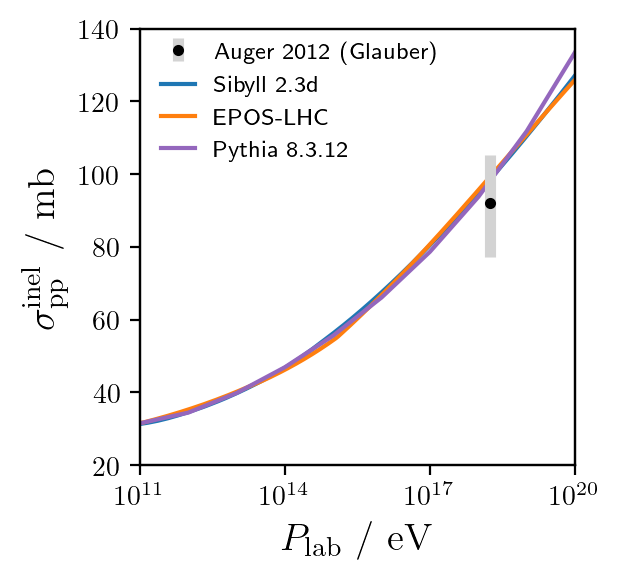

In [13]:
# pp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(20, 140))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pp}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
#ax.plot(xs_p_p_py8307[0,:], xs_p_p_py8307[1,:], "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(p_O_dataframe['plab']*1e9, xs_p_p_py8311, yerr=xs_p_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")
ax.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.errorbar(p_p_dataframe['plab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp.pdf", format='pdf')

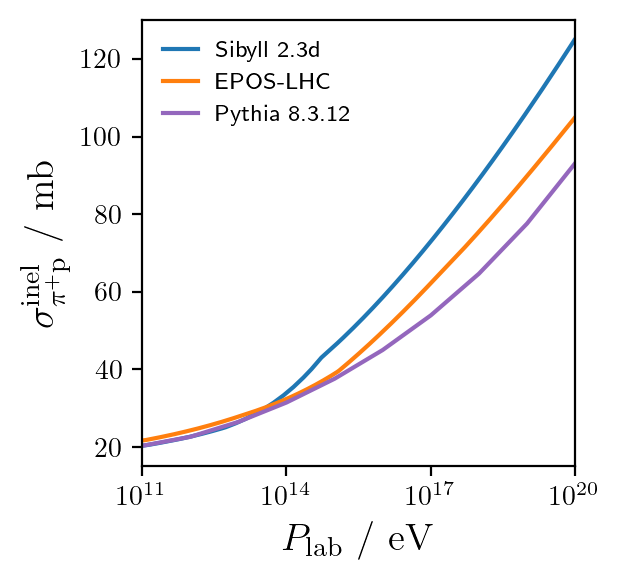

In [14]:
# pipp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_{\pi^{+}\mathrm{p}}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot(xs_pip_p_py8307[0,:], xs_pip_p_py8307[1,:], "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(pip_p_dataframe['plab']*1e9, xs_pip_p_py8311, yerr=xs_pip_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")

ax.plot(xs_pip_p_sib[0,:], xs_pip_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_pip_p_epos[0,:], xs_pip_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.errorbar(pip_p_dataframe['plab']*1e9, pip_p_dataframe['sig_inel'], yerr=pip_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pip.pdf", format='pdf')

### pO and $\pi$+ O

In [15]:
# Auger 2012
pair_stat_error = 22
pair_syst_error_pos = 28
pair_syst_error_neg = 36
pair_total_error_pos = sqrt(pair_stat_error**2 + pair_syst_error_pos**2)
pair_total_error_neg = sqrt(pair_stat_error**2 + pair_syst_error_neg**2)

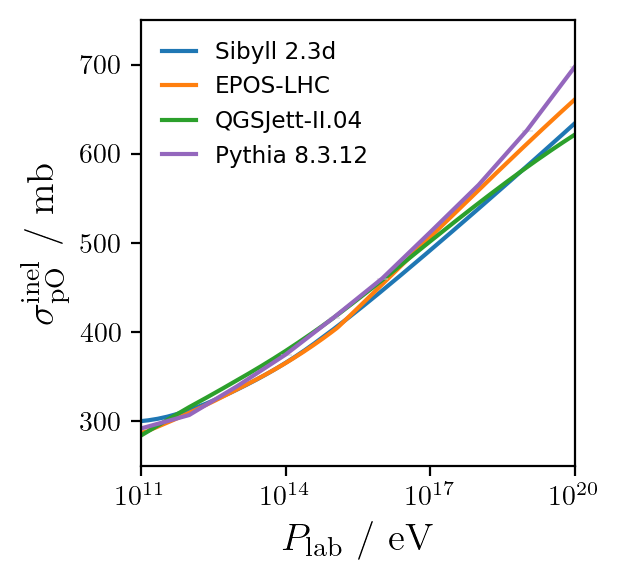

In [16]:
# pO

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250, 750))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pO}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "-", color="tab:olive", label=r"Pythia 8.307 ($\sigma_\mathrm{tot} \times f_\mathrm{inel}$)")
#ax.errorbar(elab_py8310, xs_p_O_py8310, yerr=xs_p_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(p_O_dataframe['plab']*1e9, xs_p_O_py8311, yerr=xs_p_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:orange", label="Pythia 8.3.11")

ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="tab:green", label="QGSJett-II.04")
ax.errorbar(p_O_sNN_dataframe['plab']*1e9, p_O_sNN_dataframe['sig_inel'], yerr=p_O_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_pO.pdf", format='pdf')

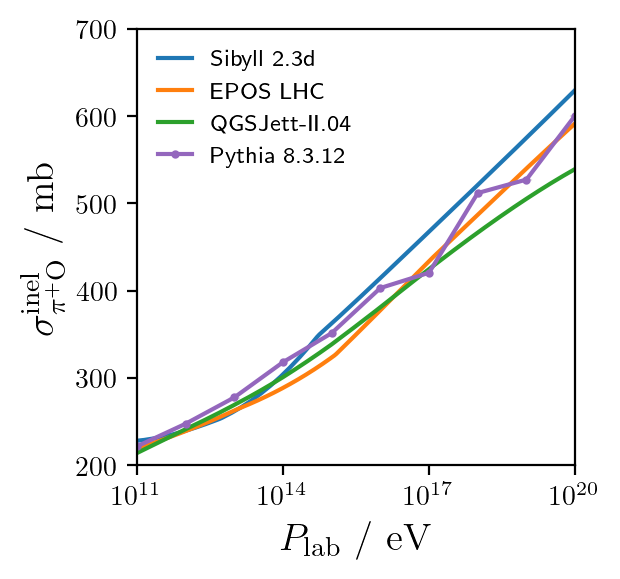

In [17]:
# pipO

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(200,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_{\pi^{+}\mathrm{O}}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot(xs_pip_O_py8307[0,:], xs_pip_O_py8307[1,:] * 0.92, "-", color="tab:olive", label=r"Pythia 8.307 ($\sigma_\mathrm{tot} \times f_\mathrm{inel}$)")
#ax.errorbar(elab_py8310, xs_pip_O_py8310, yerr=xs_pip_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(pip_O_dataframe['plab']*1e9, xs_pip_O_py8311, yerr=xs_pip_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:orange", label="Pythia 8.3.11")

ax.plot(xs_pip_O_sib[0,:], xs_pip_O_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_pip_O_epos[0,:], xs_pip_O_epos[1,:], "-", color="tab:orange", label="EPOS LHC")
ax.plot(xs_pip_O_qgs[0,:], xs_pip_O_qgs[1,:], "-", color="tab:green", label="QGSJett-II.04")
ax.errorbar(pip_O_sNN_dataframe['plab']*1e9, pip_O_sNN_dataframe['sig_inel'], yerr=pip_O_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', marker= 'o', ms=2, color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)


fig.tight_layout()
fig.savefig("xs_inel_piO.pdf", format='pdf')

### pN, HeN, NN, FeN

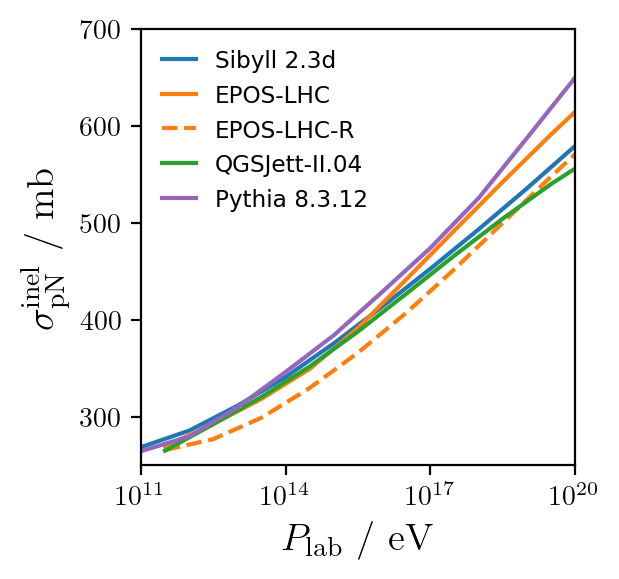

In [18]:
# pN

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250, 700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pN}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot((10 ** elab_sib_2)*1e9, xs_p_N_sib, "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xsec_p_N_inel_crmc_sib['plab'], xsec_p_N_inel_crmc_sib['sig_inel'], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_p_N_eposlhc[0]*1e9, xs_p_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax.plot(xs_p_N_eposlhcr[0]*1e9, xs_p_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS-LHC-R")
ax.plot(xs_p_N_qgsjetII04[0]*1e9, xs_p_N_qgsjetII04[1], '-', color="tab:green", label="QGSJett-II.04")
ax.errorbar(p_N_sNN_dataframe['plab']*1e9, p_N_sNN_dataframe['sig_inel'], yerr=p_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_pN.pdf", format='pdf')

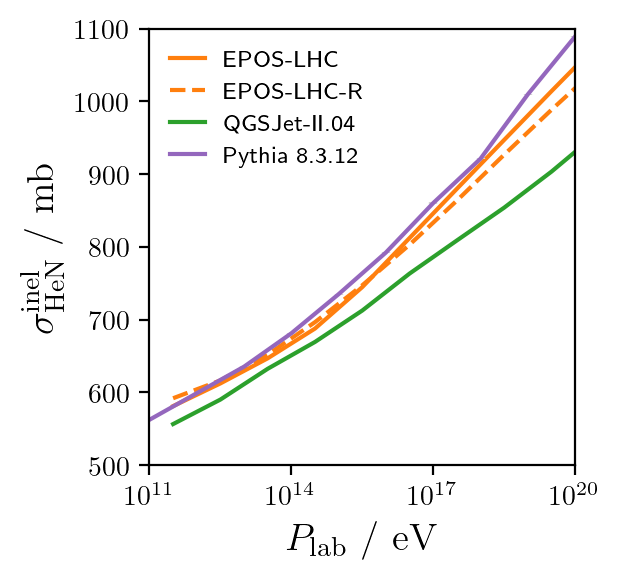

In [19]:
# HeN

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(500, 1100))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{HeN}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot((10 ** elab_sib)*1e9, xs_He_N_sib, "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_He_N_eposlhc[0]*1e9, xs_He_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax.plot(xs_He_N_eposlhcr[0]*1e9, xs_He_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS-LHC-R")
ax.plot(xs_He_N_qgsjetII04[0]*1e9, xs_He_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")
ax.errorbar(He_N_sNN_dataframe['plab']*1e9, He_N_sNN_dataframe['sig_inel'], yerr=He_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_HeN.pdf", format='pdf')

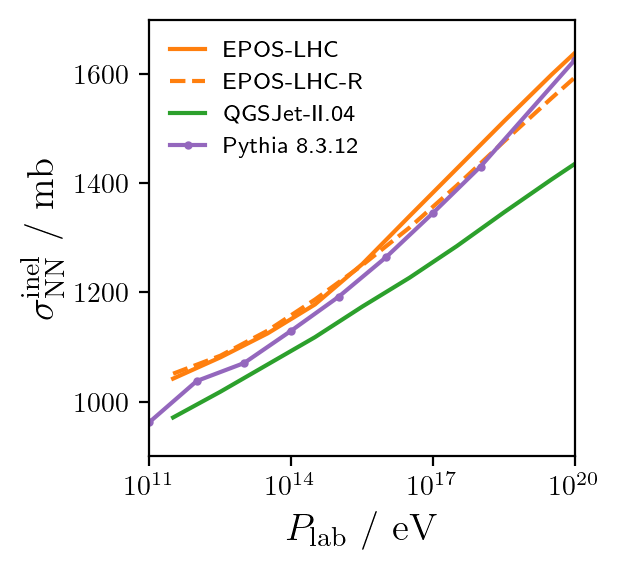

In [20]:
# NN

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(900, 1700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{NN}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot((10 ** elab_sib)*1e9, xs_N_N_sib, "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_N_N_eposlhc[0]*1e9, xs_N_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax.plot(xs_N_N_eposlhcr[0]*1e9, xs_N_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS-LHC-R")
ax.plot(xs_N_N_qgsjetII04[0]*1e9, xs_N_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")
ax.errorbar(N_N_sNN_dataframe['plab']*1e9, N_N_sNN_dataframe['sig_inel'], yerr=N_N_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot([None], [None], ls='-', marker='o', ms=2, color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)


fig.tight_layout()
fig.savefig("xs_inel_NN.pdf", format='pdf')

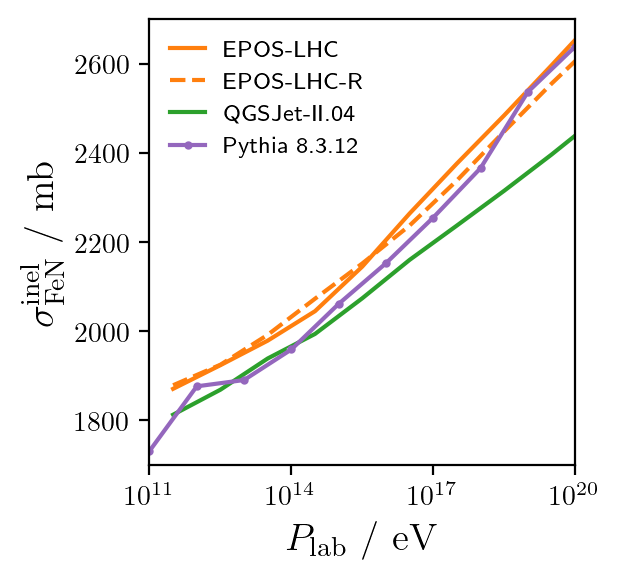

In [21]:
# FeN

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(1700, 2700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{FeN}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

#ax.plot((10 ** elab_sib)*1e9, xs_Fe_N_sib, "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_Fe_N_eposlhc[0]*1e9, xs_Fe_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax.plot(xs_Fe_N_eposlhcr[0]*1e9, xs_Fe_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS-LHC-R")
ax.plot(xs_Fe_N_qgsjetII04[0]*1e9, xs_Fe_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")
ax.errorbar(Fe_N_sNN_dataframe['plab']*1e9, Fe_N_sNN_dataframe['sig_inel'], yerr=Fe_N_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot([None], [None], ls='-', marker='o', ms=2, color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_FeN.pdf", format='pdf')

### p-air

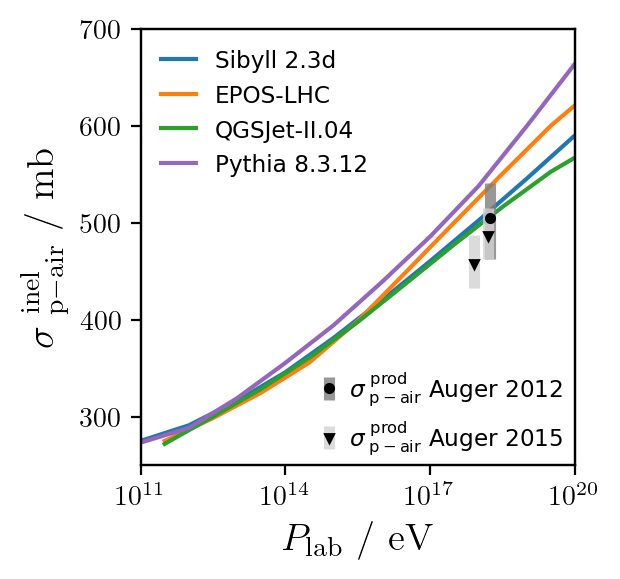

In [22]:
# p-air

def errsum(li1, li2):
    return np.sqrt( np.array(li1)**2 + np.array(li2)**2)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}_\mathrm{~p-air}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# sibyll 2.3d
num_values = 12
selected_indices = np.linspace(0, len(xsec_p_N_inel_crmc_sib['plab']) - 1, num_values, dtype=int)
elab_selected = xsec_p_N_inel_crmc_sib['plab'][selected_indices]
y_selected_N_sib = xsec_p_N_inel_crmc_sib['sig_inel'][selected_indices]
y_selected_O_sib = np.interp(elab_selected, xs_p_O_sib[0, :], xs_p_O_sib[1, :])
y_mixed_sib = 0.2 * y_selected_O_sib + 0.8 * y_selected_N_sib
x_sib = elab_selected
ax.plot(x_sib, y_mixed_sib, "-", color="tab:blue", label="Sibyll 2.3d")
#ax.plot(xsec_p_N_inel_crmc_sib['plab'], xsec_p_N_inel_crmc_sib['sig_inel'], "--", color="tab:blue")
#ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], ":", color="tab:blue")

# epos-lhc
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_eposlhc[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_eposlhc[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_eposlhc[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_epos[0, :], xs_p_O_epos[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_epos = np.zeros((2, num_values))
xs_p_air_epos[0, :] = x_selected  
xs_p_air_epos[1, :] = y_mixed 
ax.plot(xs_p_air_epos[0,:], xs_p_air_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
#ax.plot(xs_p_N_eposlhc[0,:]* 1e9, xs_p_N_eposlhc[1,:], "--", color="tab:orange")
#ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], ":", color="tab:orange")

# qgsjet-II.04
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_qgsjetII04[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_qgsjetII04[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_qgsjetII04[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_qgs[0, :], xs_p_O_qgs[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_qgs = np.zeros((2, num_values))
xs_p_air_qgs[0, :] = x_selected  
xs_p_air_qgs[1, :] = y_mixed 
ax.plot(xs_p_air_qgs[0,:], xs_p_air_qgs[1,:], "-", color="tab:green", label="QGSJet-II.04")
#ax.plot(xs_p_N_qgsjetII04[0,:], xs_p_N_qgsjetII04[1,:], "--", color="tab:green", label="QGSJett-II.04")
#ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], ":", color="tab:green", label="QGSJett-II.04")

# pythia 8.3.12
p_N_sNN_dataframe = p_N_sNN_dataframe.reset_index(drop=True)
p_O_sNN_dataframe = p_O_sNN_dataframe.reset_index(drop=True)
p_Ar_sNN_dataframe = p_Ar_sNN_dataframe.reset_index(drop=True)
p_air_dataframe = p_O_sNN_dataframe.copy()
p_air_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.21
p_air_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.78
p_air_dataframe['sig_inel_Ar'] = p_Ar_sNN_dataframe['sig_inel']*0.01
p_air_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N'] + p_air_dataframe['sig_inel_Ar']
p_air_dataframe['err_inel'] = np.sqrt((0.21 * p_O_sNN_dataframe['err_inel'])**2 + (0.78 * p_N_sNN_dataframe['err_inel'])**2 + (0.01 * p_Ar_sNN_dataframe['err_inel'])**2)
ax.errorbar(p_air_dataframe['plab']*1e9, p_air_dataframe['sig_inel'], yerr=p_air_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
#ax.errorbar(p_N_sNN_dataframe['plab']*1e9, p_N_sNN_dataframe['sig_inel'], yerr=p_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='--')
#ax.errorbar(p_O_sNN_dataframe['plab']*1e9, p_O_sNN_dataframe['sig_inel'], yerr=p_O_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls=':')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

# experiments
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[42.2], [35.6]], c='black', fmt='o', ms=3, ecolor='tab:grey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax3.errorbar(10**17.9, 457.511, yerr=[[24.7], [30.1]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2015")
ax3.errorbar(10**18.2, 485.767, yerr=[[23.6], [28.9]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4)
for collection in ax3.collections:
    collection.set_alpha(0.8)
ax3.legend(loc='lower right', bbox_to_anchor=(1.02, -0.03), fontsize="small", frameon=False, handlelength=1.5, labelspacing=0.5, handletextpad=0.1)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_p-air.pdf", format='pdf')

### Pythia 8 / EPOS-LHC ratios

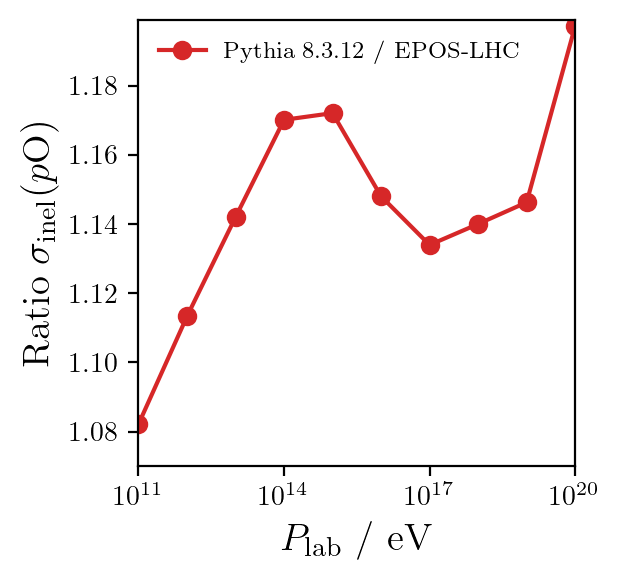

In [23]:
# pO (discrete)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2, 3), dpi=200)
ax.set(xlim=(1e11, 1e20))
ax.set(ylim=(1.07,1.199))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"Ratio $\sigma_\mathrm{inel}(p\mathrm{O})$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

interpolate_epos_at_pythia = np.interp(p_O_dataframe['plab'] * 1e9, xs_p_O_epos[0,:], xs_p_O_epos[1,:])
ratio = p_O_dataframe['sig_inel'] / interpolate_epos_at_pythia

ax.plot(p_O_dataframe['plab'] * 1e9, ratio, marker='o', color="tab:red", linestyle='-', label="Pythia 8.3.12 / EPOS-LHC")
ax.errorbar(p_O_dataframe['plab'] * 1e9, ratio, yerr=p_O_dataframe['err_inel'] / p_O_dataframe['sig_inel'], fmt='o', ms=4, color='tab:red', ecolor='lightgrey', elinewidth=2)
ax.legend(loc='upper left', fontsize="small", frameon=False)

fig.tight_layout()
fig.savefig("ratio_epos_pythia_discrete_p_O.pdf", format='pdf')

plt.show()


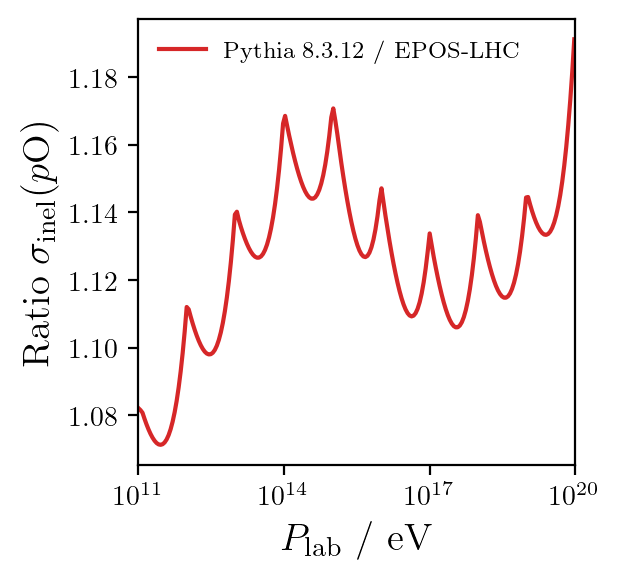

In [24]:
# pO (full)
 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11, 1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"Ratio $\sigma_\mathrm{inel}(p\mathrm{O})$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

interpolate_pythia_at_epos = np.interp(xs_p_O_epos[0,:], p_O_dataframe['plab']*1e9, p_O_dataframe['sig_inel'])
ratio =  interpolate_pythia_at_epos / xs_p_O_epos[1,:]

ax.plot(xs_p_O_epos[0,:], ratio, "-", color="tab:red", label="Pythia 8.3.12 / EPOS-LHC")
ax.legend(loc='upper left', fontsize="small", frameon=False)

fig.tight_layout()
fig.savefig("ratio_epos_pythia_full_p_O.pdf", format='pdf')

plt.show()


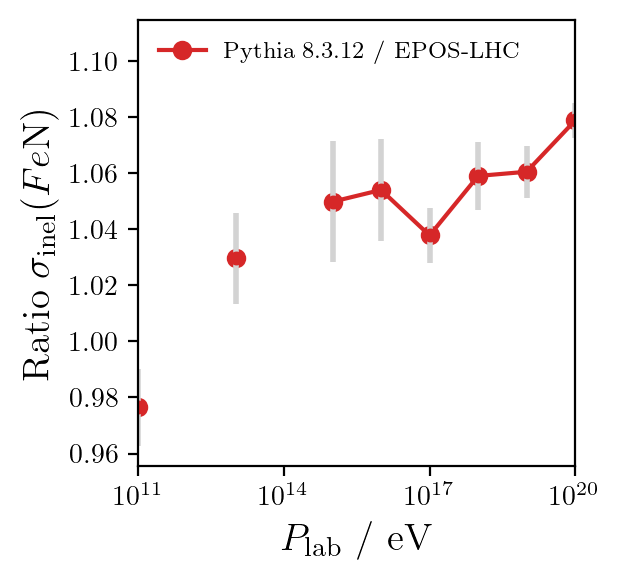

In [25]:
# FeN

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2, 3), dpi=200)
ax.set(xlim=(1e11, 1e20))
#ax.set(ylim=(1.07,1.199))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"Ratio $\sigma_\mathrm{inel}(Fe\mathrm{N})$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

interpolate_epos_at_pythia = np.interp(Fe_N_dataframe['plab'] * 1e9, xs_Fe_N_eposlhc[0]*1e9, xs_Fe_N_eposlhc[1])
ratio = Fe_N_dataframe['sig_inel'] / interpolate_epos_at_pythia

ax.plot(Fe_N_dataframe['plab'] * 1e9, ratio, marker='o', color="tab:red", linestyle='-', label="Pythia 8.3.12 / EPOS-LHC")
ax.errorbar(Fe_N_dataframe['plab'] * 1e9, ratio, yerr=Fe_N_dataframe['err_inel'] / Fe_N_dataframe['sig_inel'], fmt='o', ms=4, color='tab:red', ecolor='lightgrey', elinewidth=2)
ax.legend(loc='upper left', fontsize="small", frameon=False)

fig.tight_layout()
fig.savefig("ratio_epos_pythia_discrete_Fe_N.pdf", format='pdf')

plt.show()

In [26]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

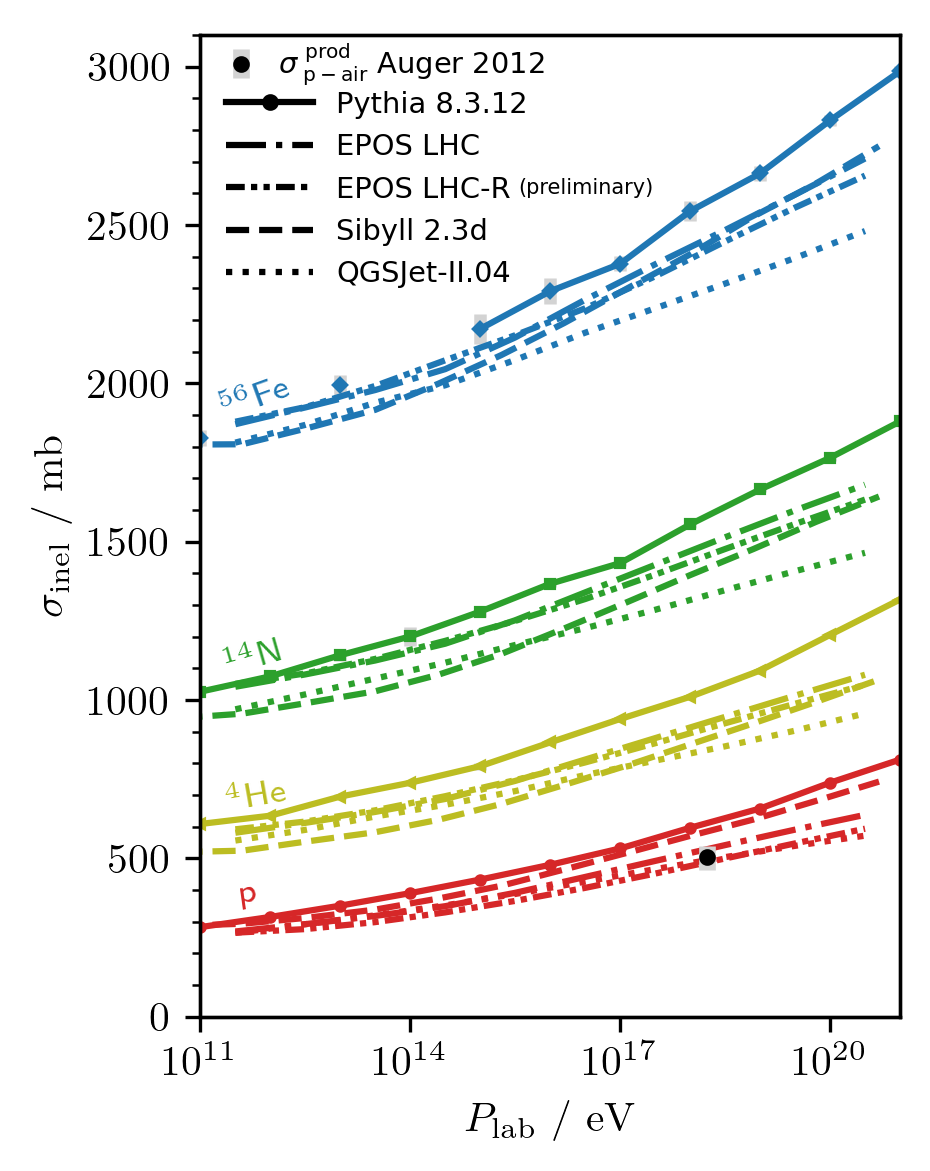

In [29]:
# pN, HeN, NN, FeN
 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,4), dpi=300)
#ax.set_title("X $^{14}$N interactions with Pythia 8.3.12", fontsize=7)
ax.set(xlim=(1e11,1e21))
ax.set(ylim=(0,3100))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma_\mathrm{inel}$ / $\mathrm{mb}$")
#ax.xaxis.label.set_size(7) 
#ax.yaxis.label.set_size(7)

#ax.tick_params(axis='both', which='major', width=0.5)
#ax.tick_params(axis='both', which='minor', width=0.25)

#for spine in ax.spines.values():
#    spine.set_linewidth(0.25)

ax.errorbar(Fe_N_dataframe['plab']*1e9, Fe_N_dataframe['sig_inel'], yerr=Fe_N_dataframe['err_inel'], c='tab:blue', fmt='D', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot((10 ** elab_sib_HeN_NN_FeN)*1e9, xs_Fe_N_sib, "--", color="tab:blue")
ax.plot(xs_Fe_N_eposlhc[0]*1e9, xs_Fe_N_eposlhc[1], "-.", color="tab:blue")
ax.plot(xs_Fe_N_eposlhcr[0]*1e9, xs_Fe_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:blue")
ax.plot(xs_Fe_N_qgsjetII04[0]*1e9, xs_Fe_N_qgsjetII04[1], ':', color="tab:blue")
#ax.plot([None], [None], ls='-', color="tab:blue", label="$^{56}$Fe")
ax.text(10 ** 11.8, 1890, "$^{56}$Fe", fontsize="small", ha='center', color='tab:blue', rotation=20)

ax.errorbar(N_N_dataframe['plab']*1e9, N_N_dataframe['sig_inel'], yerr=N_N_dataframe['err_inel'], c='tab:green', fmt='s', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot((10 ** elab_sib_HeN_NN_FeN)*1e9, xs_N_N_sib, "--", color="tab:green")
ax.plot(xs_N_N_eposlhc[0]*1e9, xs_N_N_eposlhc[1], "-.", color="tab:green")
ax.plot(xs_N_N_eposlhcr[0]*1e9, xs_N_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:green")
ax.plot(xs_N_N_qgsjetII04[0]*1e9, xs_N_N_qgsjetII04[1], ':', color="tab:green")
#ax.plot([None], [None], ls='-', color="tab:green", label="$^{14}$N")
ax.text(10 ** 11.8, 1080, "$^{14}$N", fontsize="small", ha='center', color='tab:green', rotation=16)

ax.errorbar(He_N_dataframe['plab']*1e9, He_N_dataframe['sig_inel'], yerr=He_N_dataframe['err_inel'], c='tab:olive', fmt='<', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot((10 ** elab_sib_HeN_NN_FeN)*1e9, xs_He_N_sib, "--", color="tab:olive")
ax.plot(xs_He_N_eposlhc[0]*1e9, xs_He_N_eposlhc[1], "-.", color="tab:olive")
ax.plot(xs_He_N_eposlhcr[0]*1e9, xs_He_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:olive")
ax.plot(xs_He_N_qgsjetII04[0]*1e9, xs_He_N_qgsjetII04[1], ':', color="tab:olive")
#ax.plot([None], [None], ls='-', color="tab:olive", label="$^{4}$He")
ax.text(10 ** 11.8, 650, "$^{4}$He", fontsize="small", ha='center', color='tab:olive', rotation=10)

ax.errorbar(p_N_dataframe['plab']*1e9, p_N_dataframe['sig_inel'], yerr=p_N_dataframe['err_inel'], c='tab:red', fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax.plot((10 ** elab_sib_pN)*1e9, xs_p_N_sib, "--", color="tab:red")
ax.plot(xs_p_N_eposlhc[0]*1e9, xs_p_N_eposlhc[1], "-.", color="tab:red")
ax.plot(xs_p_N_eposlhcr[0]*1e9, xs_p_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:red")
ax.plot(xs_p_N_qgsjetII04[0]*1e9, xs_p_N_qgsjetII04[1], ':', color="tab:red")
#ax.plot([None], [None], ls='-', color="tab:red", label="p")
ax.text(10 ** 11.7, 360, "p", fontsize="small", ha='center', color='tab:red', rotation=8)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax.plot([None], [None], ".-", color="black", label="Pythia 8.3.12")
ax.plot([None], [None], "-.", color="black", label="EPOS LHC")
ax.plot([None], [None], linestyle=(0, (3, 1, 1, 1, 1, 1)), color="black", label="EPOS LHC-R")
ax.text(10 ** 15.55, 2650, '(preliminary)', fontsize=5, verticalalignment='top', horizontalalignment='left')

ax.plot([None], [None], "--", color="black", label="Sibyll 2.3d")
ax.plot([None], [None], ":", color="black", label="QGSJet-II.04")

#ax.text(10 ** 20, 200, "X $^{14}$N", fontsize="small", ha='center', color='black')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.97), fontsize="x-small", frameon=False, handlelength=3)

#ax.grid(visible=True, which='major', axis='y', alpha=0.3)
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
ax.set_yticks(range(0, 3200, 100), minor=True)
ax.yaxis.set_ticks_position('both') 
ax.tick_params(axis='y', which='both', labelright=False)

#ax.tick_params(axis='both', which='major', width=0.5, labelsize=7) 

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.get_yaxis().set_visible(False)
ax2.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="x-small", frameon=False, handlelength=1)

fig.tight_layout()
fig.savefig("xs_inel_XN.pdf", format='pdf')

## ISVHECRI 2024 proceeding

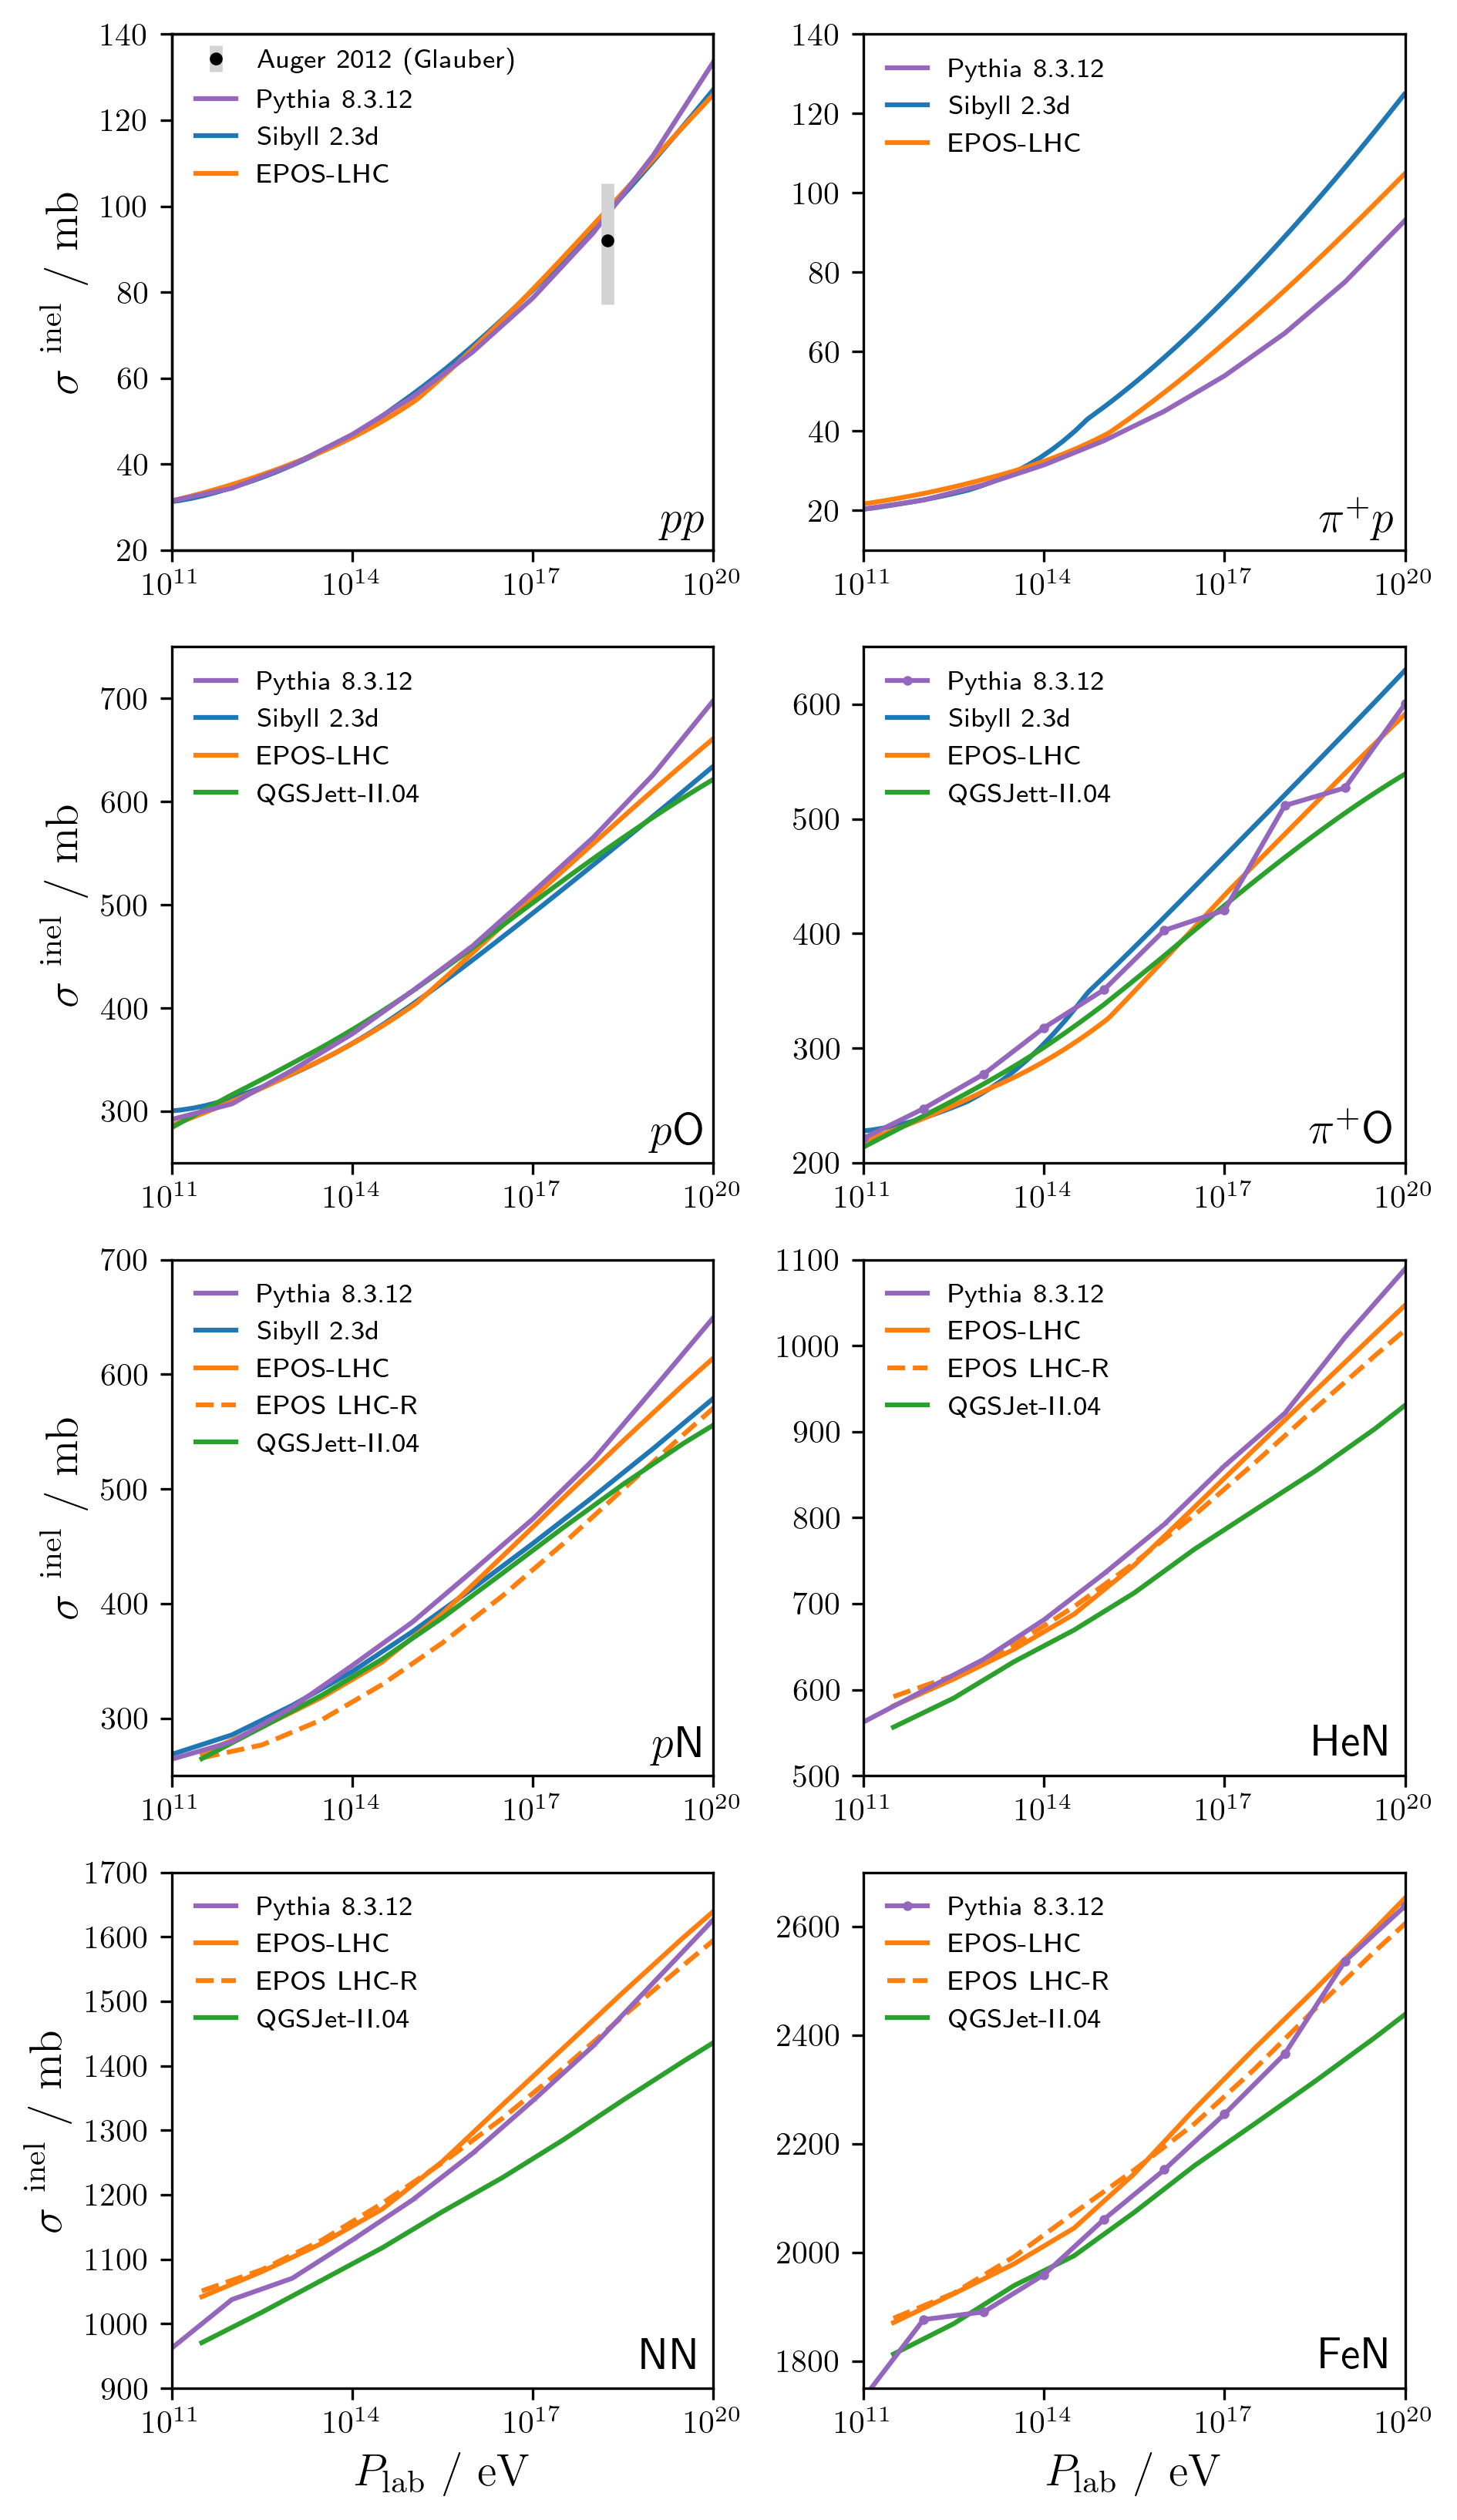

In [30]:
# pp, pipp, pO, pipO, pN, HeN, NN, FeN

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# pp Auger (Glauber) cross-section
pp_stat_error = 7
pp_syst_error_pos = 9
pp_syst_error_neg = 11
pp_glauber_error = 7
pp_total_error_pos = sqrt(pp_stat_error**2 + pp_syst_error_pos**2 + pp_glauber_error**2)
pp_total_error_neg = sqrt(pp_stat_error**2 + pp_syst_error_neg**2 + pp_glauber_error**2)

fig = plt.figure(figsize=(6.4, 11), dpi=300)
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1, 1], figure=fig)

"""
[pp] [pipp]
[pO] [pipO]
[pN] [HeN]
[NN] [FeN]
"""

# pp
ax1 = fig.add_subplot(gs[0, 0])
ax1.set(xlim=(1e11,1e20), ylim=(20, 140))
ax1.set_xscale('log')
ax1.set(ylabel=r"$\sigma^\mathrm{~inel}$ / $\mathrm{mb}$")
ax1.yaxis.label.set_size(14)

ax1.errorbar(p_p_dataframe['plab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax1.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax1.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax1.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)
ax1.text(0.98, 0.02, r"$pp$", fontsize=14, ha='right', va='bottom', transform=ax1.transAxes)

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.get_yaxis().set_visible(False)
ax2.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

# pipp
ax4 = fig.add_subplot(gs[0, 1])
ax4.set(xlim=(1e11,1e20), ylim=(10, 140))
ax4.set_xscale('log')
ax4.errorbar(pip_p_dataframe['plab']*1e9, pip_p_dataframe['sig_inel'], yerr=pip_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax4.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax4.plot(xs_pip_p_sib[0,:], xs_pip_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax4.plot(xs_pip_p_epos[0,:], xs_pip_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax4.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax4.text(0.98, 0.02, r"$\pi^{+}p$", fontsize=14, ha='right', va='bottom', transform=ax4.transAxes)

# pO
ax6 = fig.add_subplot(gs[1, 0])
ax6.set(xlim=(1e11,1e20), ylim=(250, 750))
ax6.set_xscale('log')
ax6.set(ylabel=r"$\sigma^\mathrm{~inel}$ / $\mathrm{mb}$")
ax6.yaxis.label.set_size(14)
ax6.errorbar(p_O_sNN_dataframe['plab']*1e9, p_O_sNN_dataframe['sig_inel'], yerr=p_O_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax6.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax6.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax6.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax6.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="tab:green", label="QGSJett-II.04")
ax6.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax6.text(0.98, 0.02, r"$p$O", fontsize=14, ha='right', va='bottom', transform=ax6.transAxes)

# pipO
ax9 = fig.add_subplot(gs[1, 1])
ax9.set(xlim=(1e11,1e20), ylim=(200, 650))
ax9.set_xscale('log')

ax9.errorbar(pip_O_sNN_dataframe['plab']*1e9, pip_O_sNN_dataframe['sig_inel'], yerr=pip_O_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax9.plot([None], [None], ls='-', marker= 'o', ms=2, color="tab:purple", label="Pythia 8.3.12")
ax9.plot(xs_pip_O_sib[0,:], xs_pip_O_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax9.plot(xs_pip_O_epos[0,:], xs_pip_O_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax9.plot(xs_pip_O_qgs[0,:], xs_pip_O_qgs[1,:], "-", color="tab:green", label="QGSJett-II.04")
ax9.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

plt.rcParams['text.usetex'] = True
ax9.text(0.98, 0.02, r"$\pi^{+}$O", fontsize=14, ha='right', va='bottom', transform=ax9.transAxes)

# pN
ax11 = fig.add_subplot(gs[2, 0])
ax11.set(xlim=(1e11,1e20), ylim=(250, 700))
ax11.set_xscale('log')
ax11.set(ylabel=r"$\sigma^\mathrm{~inel}$ / $\mathrm{mb}$")
ax11.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax11.errorbar(p_N_sNN_dataframe['plab']*1e9, p_N_sNN_dataframe['sig_inel'], yerr=p_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=3, ls='-')
ax11.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax11.plot(xsec_p_N_inel_crmc_sib['plab'], xsec_p_N_inel_crmc_sib['sig_inel'], "-", color="tab:blue", label="Sibyll 2.3d")
ax11.plot(xs_p_N_eposlhc[0]*1e9, xs_p_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax11.plot(xs_p_N_eposlhcr[0]*1e9, xs_p_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS LHC-R")
ax11.plot(xs_p_N_qgsjetII04[0]*1e9, xs_p_N_qgsjetII04[1], '-', color="tab:green", label="QGSJett-II.04")
ax11.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

plt.rcParams['text.usetex'] = True
ax11.text(0.98, 0.02, r"$p$N", fontsize=14, ha='right', va='bottom', transform=ax11.transAxes)

# HeN
ax14 = fig.add_subplot(gs[2, 1])
ax14.set(xlim=(1e11,1e20), ylim=(500, 1100))
ax14.set_xscale('log')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax14.errorbar(He_N_sNN_dataframe['plab']*1e9, He_N_sNN_dataframe['sig_inel'], yerr=He_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=3, ls='-')
ax14.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax14.plot(xs_He_N_eposlhc[0]*1e9, xs_He_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax14.plot(xs_He_N_eposlhcr[0]*1e9, xs_He_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS LHC-R")
ax14.plot(xs_He_N_qgsjetII04[0]*1e9, xs_He_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")

ax14.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)
ax14.text(0.98, 0.02, r"HeN", fontsize=14, ha='right', va='bottom', transform=ax14.transAxes)

# NN
ax16 = fig.add_subplot(gs[3, 0])
ax16.set(xlim=(1e11,1e20), ylim=(900, 1700))
ax16.set_xscale('log')
ax16.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}$ / $\mathrm{mb}$")
ax16.xaxis.label.set_size(14) 
ax16.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax16.errorbar(N_N_sNN_dataframe['plab']*1e9, N_N_sNN_dataframe['sig_inel'], yerr=N_N_sNN_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=3, ls='-')
ax16.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax16.plot(xs_N_N_eposlhc[0]*1e9, xs_N_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax16.plot(xs_N_N_eposlhcr[0]*1e9, xs_N_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS LHC-R")
ax16.plot(xs_N_N_qgsjetII04[0]*1e9, xs_N_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")

ax16.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)
ax16.text(0.98, 0.02, r"NN", fontsize=14, ha='right', va='bottom', transform=ax16.transAxes)

# FeN
ax18 = fig.add_subplot(gs[3, 1])
ax18.set(xlim=(1e11,1e20), ylim=(1750,2700))
ax18.set_xscale('log')
ax18.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$")
ax18.xaxis.label.set_size(14) 

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax18.errorbar(Fe_N_sNN_dataframe['plab']*1e9, Fe_N_sNN_dataframe['sig_inel'], yerr=Fe_N_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=3, ls='-')
ax18.plot([None], [None], ls='-', marker= 'o', ms=2, color="tab:purple", label="Pythia 8.3.12")
#ax18.plot((10 ** elab_sib)*1e9, xs_Fe_N_sib, "-", color="tab:blue", label="Sibyll 2.3d")
ax18.plot(xs_Fe_N_eposlhc[0]*1e9, xs_Fe_N_eposlhc[1], "-", color="tab:orange", label="EPOS-LHC")
ax18.plot(xs_Fe_N_eposlhcr[0]*1e9, xs_Fe_N_eposlhcr[1], linestyle="--", color="tab:orange", label="EPOS LHC-R")
ax18.plot(xs_Fe_N_qgsjetII04[0]*1e9, xs_Fe_N_qgsjetII04[1], '-', color="tab:green", label="QGSJet-II.04")

ax18.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)
ax18.text(0.98, 0.02, r"FeN", fontsize=14, ha='right', va='bottom', transform=ax18.transAxes)

#fig.text(0.5, 0.04, r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ha='center')
#fig.text(0.04, 0.5, r"$\sigma_\mathrm{inel}$ / $\mathrm{mb}$", va='center', rotation='vertical')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig.tight_layout()
fig.savefig("xs_inel_pp_pipp_pO_pipO_pN_HeN_NN_FeN_ISVHECRI_2024.pdf", format='pdf')

plt.show()


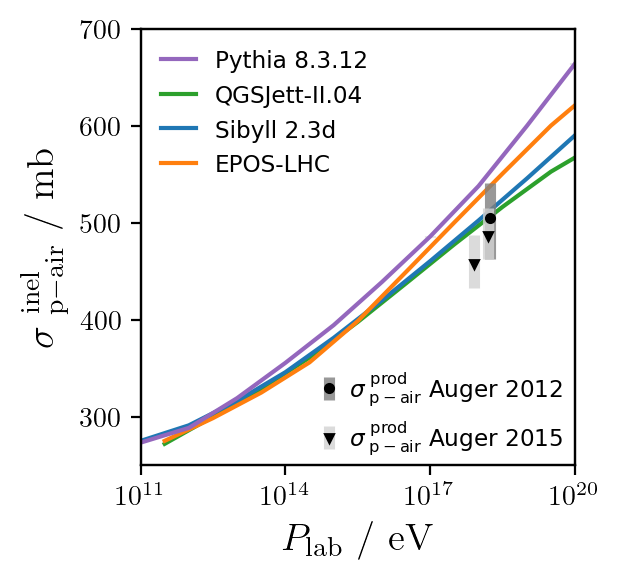

In [31]:
# p-air

def errsum(li1, li2):
    return np.sqrt( np.array(li1)**2 + np.array(li2)**2)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}_\mathrm{~p-air}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# pythia 8.3.12
p_N_sNN_dataframe = p_N_sNN_dataframe.reset_index(drop=True)
p_O_sNN_dataframe = p_O_sNN_dataframe.reset_index(drop=True)
p_Ar_sNN_dataframe = p_Ar_sNN_dataframe.reset_index(drop=True)
p_air_dataframe = p_O_sNN_dataframe.copy()
p_air_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.21
p_air_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.78
p_air_dataframe['sig_inel_Ar'] = p_Ar_sNN_dataframe['sig_inel']*0.01
p_air_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N'] + p_air_dataframe['sig_inel_Ar']
p_air_dataframe['err_inel'] = np.sqrt((0.21 * p_O_sNN_dataframe['err_inel'])**2 + (0.78 * p_N_sNN_dataframe['err_inel'])**2 + (0.01 * p_Ar_sNN_dataframe['err_inel'])**2)
ax.errorbar(p_air_dataframe['plab']*1e9, p_air_dataframe['sig_inel'], yerr=p_air_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")

# qgsjet-II.04
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_qgsjetII04[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_qgsjetII04[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_qgsjetII04[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_qgs[0, :], xs_p_O_qgs[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_qgs = np.zeros((2, num_values))
xs_p_air_qgs[0, :] = x_selected  
xs_p_air_qgs[1, :] = y_mixed 
ax.plot(xs_p_air_qgs[0,:], xs_p_air_qgs[1,:], "-", color="tab:green", label="QGSJett-II.04")

# sibyll 2.3d
num_values = 12
selected_indices = np.linspace(0, len(xsec_p_N_inel_crmc_sib['plab']) - 1, num_values, dtype=int)
elab_selected = xsec_p_N_inel_crmc_sib['plab'][selected_indices]
y_selected_N_sib = xsec_p_N_inel_crmc_sib['sig_inel'][selected_indices]
y_selected_O_sib = np.interp(elab_selected, xs_p_O_sib[0, :], xs_p_O_sib[1, :])
y_mixed_sib = 0.2 * y_selected_O_sib + 0.8 * y_selected_N_sib
x_sib = elab_selected
ax.plot(x_sib, y_mixed_sib, "-", color="tab:blue", label="Sibyll 2.3d")

# epos-lhc
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_eposlhc[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_eposlhc[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_eposlhc[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_epos[0, :], xs_p_O_epos[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_epos = np.zeros((2, num_values))
xs_p_air_epos[0, :] = x_selected  
xs_p_air_epos[1, :] = y_mixed 
ax.plot(xs_p_air_epos[0,:], xs_p_air_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

# experiments
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[42.2], [35.6]], c='black', fmt='o', ms=3, ecolor='tab:grey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax3.errorbar(10**17.9, 457.511, yerr=[[24.7], [30.1]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2015")
ax3.errorbar(10**18.2, 485.767, yerr=[[23.6], [28.9]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4)
for collection in ax3.collections:
    collection.set_alpha(0.8)
ax3.legend(loc='lower right', bbox_to_anchor=(1.02, -0.03), fontsize="small", frameon=False, handlelength=1.5, labelspacing=0.5, handletextpad=0.1)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_p-air_ISVHECRI_2024.pdf", format='pdf')

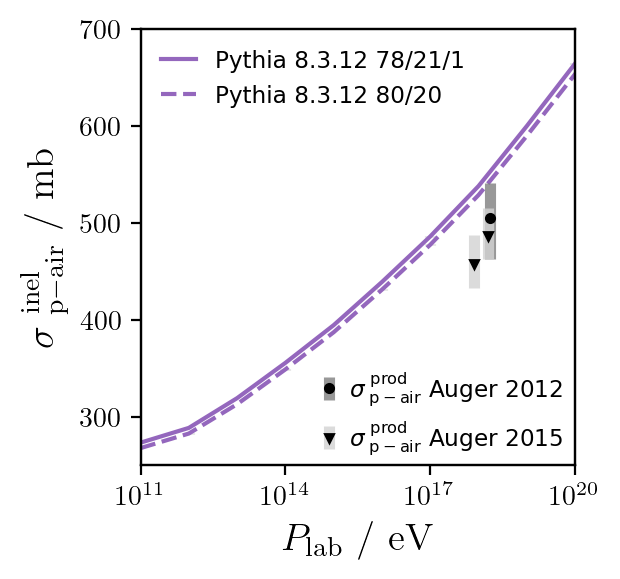

In [32]:
# p-air Pythia: 80/20 vs. 78/21/1

from scipy.interpolate import interp1d

def errsum(li1, li2):
    return np.sqrt( np.array(li1)**2 + np.array(li2)**2)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}_\mathrm{~p-air}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# pythia 8.3.12
p_N_sNN_dataframe = p_N_sNN_dataframe.reset_index(drop=True)
p_O_sNN_dataframe = p_O_sNN_dataframe.reset_index(drop=True)
p_Ar_sNN_dataframe = p_Ar_sNN_dataframe.reset_index(drop=True)
p_air_dataframe = p_O_sNN_dataframe.copy()
p_air_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.21
p_air_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.78
p_air_dataframe['sig_inel_Ar'] = p_Ar_sNN_dataframe['sig_inel']*0.01

p_air_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N'] + p_air_dataframe['sig_inel_Ar']
p_air_dataframe['err_inel'] = np.sqrt((0.21 * p_O_sNN_dataframe['err_inel'])**2 + (0.78 * p_N_sNN_dataframe['err_inel'])**2 + (0.01 * p_Ar_sNN_dataframe['err_inel'])**2)

p_air_basic_dataframe = p_O_sNN_dataframe.copy()
p_air_basic_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.2
p_air_basic_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.8
p_air_basic_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N']
p_air_basic_dataframe['err_inel'] = np.sqrt((0.2 * p_O_sNN_dataframe['err_inel'])**2 + (0.8 * p_N_sNN_dataframe['err_inel'])**2 )

ax.errorbar(p_air_dataframe['plab']*1e9, p_air_dataframe['sig_inel'], yerr=p_air_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12 78/21/1")
ax.errorbar(p_air_basic_dataframe['plab']*1e9, p_air_basic_dataframe['sig_inel'], yerr=p_air_basic_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='--', color="tab:purple", label="Pythia 8.3.12 80/20")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

# experiments
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[42.2], [35.6]], c='black', fmt='o', ms=3, ecolor='tab:grey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax3.errorbar(10**17.9, 457.511, yerr=[[24.7], [30.1]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2015")
ax3.errorbar(10**18.2, 485.767, yerr=[[23.6], [28.9]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4)
for collection in ax3.collections:
    collection.set_alpha(0.8)
ax3.legend(loc='lower right', bbox_to_anchor=(1.02, -0.03), fontsize="small", frameon=False, handlelength=1.5, labelspacing=0.5, handletextpad=0.1)

plt.rcParams['text.usetex'] = True

#ax2 = ax.twinx()
#ax2.get_yaxis().set_visible(False)
#ax2.plot([None], [None], "-", color="black", label=r"$p$\,-air")
#ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_p-air_pythia.pdf", format='pdf')

## c8_fix

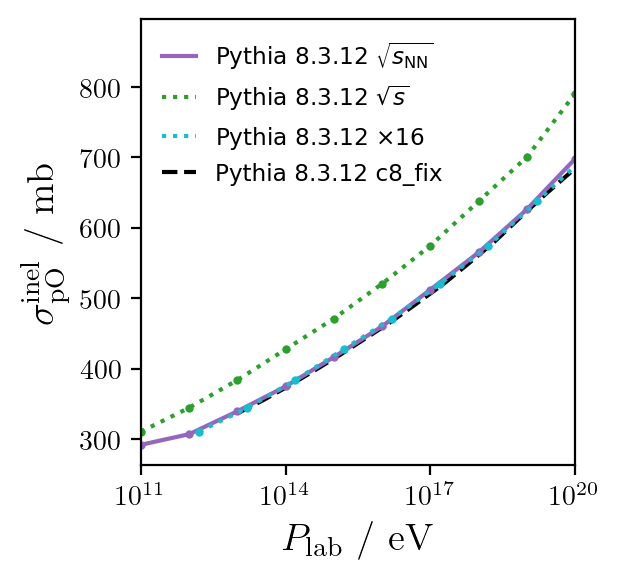

In [33]:
# pO

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pO}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax.errorbar(p_O_sNN_dataframe['plab']*1e9, p_O_sNN_dataframe['sig_inel'], yerr=p_O_sNN_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label=r"Pythia 8.3.12 $\sqrt{s_\mathrm{NN}}$")
ax.errorbar(p_O_dataframe['plab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls=':')
ax.plot([None], [None], ls=':', color="tab:green", label=r"Pythia 8.3.12 $\sqrt{s}$")
ax.errorbar(16*p_O_dataframe['plab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:cyan', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls=':')
ax.plot([None], [None], ls=':', color="tab:cyan", label=r"Pythia 8.3.12 $\times$16")
ax.plot(xsec_p_O_p8_fix["E_lab_GeV"]*1e9, xsec_p_O_p8_fix["production_cross_section_p_O16_mb"], "--", color="black", label="Pythia 8.3.12 c8_fix")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_pO_sNN_fix.png", dpi=400)
fig.savefig("xs_inel_pO_sNN_fix.pdf", format='pdf')

# UHECR 2024

### UHECR 2024 poster

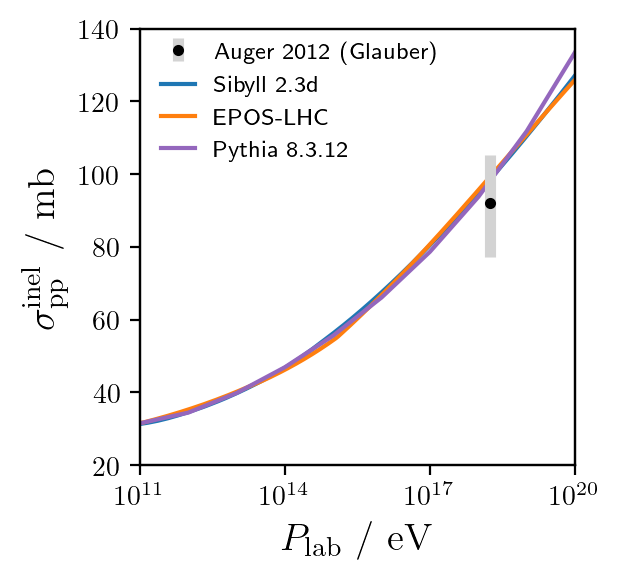

In [34]:
# pp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(20, 140))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pp}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax.errorbar(p_p_dataframe['plab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp_UHECR_2024_poster.pdf", format='pdf')

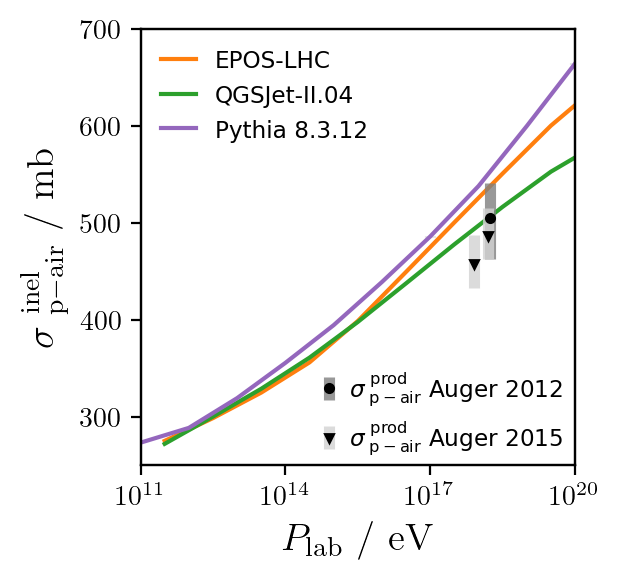

In [36]:
# p-air

def errsum(li1, li2):
    return np.sqrt( np.array(li1)**2 + np.array(li2)**2)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}_\mathrm{~p-air}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# sibyll 2.3d
num_values = 12
selected_indices = np.linspace(0, len(xs_p_N_sib) - 1, num_values, dtype=int)
elab_selected = (10 ** elab_sib_pN)[selected_indices] * 1e9
y_selected_N_sib = xs_p_N_sib[selected_indices]
y_selected_O_sib = np.interp(elab_selected, xs_p_O_sib[0, :], xs_p_O_sib[1, :])
y_mixed_sib = 0.2 * y_selected_O_sib + 0.8 * y_selected_N_sib
x_sib = elab_selected
#ax.plot(x_sib, y_mixed_sib, "-", color="tab:blue", label="Sibyll 2.3d")

# epos-lhc
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_eposlhc[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_eposlhc[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_eposlhc[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_epos[0, :], xs_p_O_epos[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_epos = np.zeros((2, num_values))
xs_p_air_epos[0, :] = x_selected  
xs_p_air_epos[1, :] = y_mixed 
ax.plot(xs_p_air_epos[0,:], xs_p_air_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")

# qgsjet-II.04
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_qgsjetII04[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_qgsjetII04[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_qgsjetII04[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_qgs[0, :], xs_p_O_qgs[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_qgs = np.zeros((2, num_values))
xs_p_air_qgs[0, :] = x_selected  
xs_p_air_qgs[1, :] = y_mixed 
ax.plot(xs_p_air_qgs[0,:], xs_p_air_qgs[1,:], "-", color="tab:green", label="QGSJet-II.04")

# pythia 8.3.12
p_N_sNN_dataframe = p_N_sNN_dataframe.reset_index(drop=True)
p_O_sNN_dataframe = p_O_sNN_dataframe.reset_index(drop=True)
p_Ar_sNN_dataframe = p_Ar_sNN_dataframe.reset_index(drop=True)
p_air_dataframe = p_O_sNN_dataframe.copy()
p_air_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.21
p_air_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.78
p_air_dataframe['sig_inel_Ar'] = p_Ar_sNN_dataframe['sig_inel']*0.01
p_air_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N'] + p_air_dataframe['sig_inel_Ar']
p_air_dataframe['err_inel'] = np.sqrt((0.21 * p_O_sNN_dataframe['err_inel'])**2 + (0.78 * p_N_sNN_dataframe['err_inel'])**2 + (0.01 * p_Ar_sNN_dataframe['err_inel'])**2)
ax.errorbar(p_air_dataframe['plab']*1e9, p_air_dataframe['sig_inel'], yerr=p_air_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

# experiments
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[42.2], [35.6]], c='black', fmt='o', ms=3, ecolor='tab:grey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax3.errorbar(10**17.9, 457.511, yerr=[[24.7], [30.1]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2015")
ax3.errorbar(10**18.2, 485.767, yerr=[[23.6], [28.9]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4)
for collection in ax3.collections:
    collection.set_alpha(0.8)
ax3.legend(loc='lower right', bbox_to_anchor=(1.02, -0.03), fontsize="small", frameon=False, handlelength=1.5, labelspacing=0.5, handletextpad=0.1)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_p-air_UHECR_2024_poster.pdf", format='pdf')

### ECRS 2024 proceeding

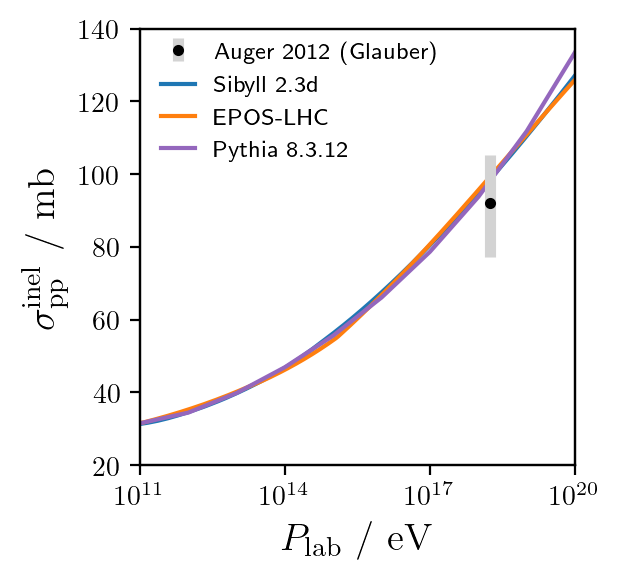

In [39]:
# pp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(20, 140))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{inel}_\mathrm{pp}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

ax.errorbar(p_p_dataframe['plab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="tab:blue", label="Sibyll 2.3d")
ax.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp_ECRS_2024_proceeding.pdf", format='pdf')

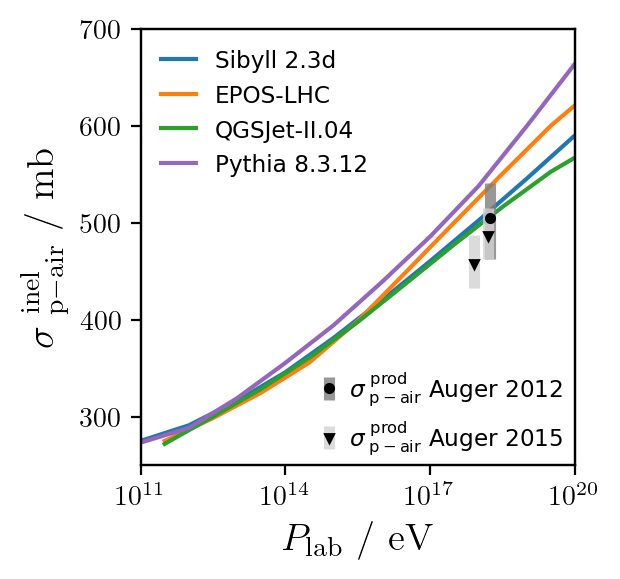

In [40]:
# p-air

def errsum(li1, li2):
    return np.sqrt( np.array(li1)**2 + np.array(li2)**2)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(250,700))
ax.set_xscale('log')
ax.set(xlabel=r"$P_\mathrm{lab}$ / $\mathrm{eV}$", ylabel=r"$\sigma^\mathrm{~inel}_\mathrm{~p-air}$ / $\mathrm{mb}$")
ax.xaxis.label.set_size(14) 
ax.yaxis.label.set_size(14)

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# sibyll 2.3d
num_values = 12
selected_indices = np.linspace(0, len(xsec_p_N_inel_crmc_sib['plab']) - 1, num_values, dtype=int)
elab_selected = xsec_p_N_inel_crmc_sib['plab'][selected_indices]
y_selected_N_sib = xsec_p_N_inel_crmc_sib['sig_inel'][selected_indices]
y_selected_O_sib = np.interp(elab_selected, xs_p_O_sib[0, :], xs_p_O_sib[1, :])
y_mixed_sib = 0.2 * y_selected_O_sib + 0.8 * y_selected_N_sib
x_sib = elab_selected
ax.plot(x_sib, y_mixed_sib, "-", color="tab:blue", label="Sibyll 2.3d")

# epos-lhc
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_eposlhc[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_eposlhc[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_eposlhc[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_epos[0, :], xs_p_O_epos[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_epos = np.zeros((2, num_values))
xs_p_air_epos[0, :] = x_selected  
xs_p_air_epos[1, :] = y_mixed 
ax.plot(xs_p_air_epos[0,:], xs_p_air_epos[1,:], "-", color="tab:orange", label="EPOS-LHC")

# qgsjet-II.04
num_values = 10
selected_indices = np.linspace(0, len(xs_p_N_qgsjetII04[0, :]) - 1, num_values, dtype=int)
x_selected = xs_p_N_qgsjetII04[0, selected_indices] * 1e9 
y_selected_N = xs_p_N_qgsjetII04[1, selected_indices]
y_selected_O = np.interp(x_selected, xs_p_O_qgs[0, :], xs_p_O_qgs[1, :])
y_mixed = 0.2 * y_selected_O + 0.8 * y_selected_N
xs_p_air_qgs = np.zeros((2, num_values))
xs_p_air_qgs[0, :] = x_selected  
xs_p_air_qgs[1, :] = y_mixed 
ax.plot(xs_p_air_qgs[0,:], xs_p_air_qgs[1,:], "-", color="tab:green", label="QGSJet-II.04")

# pythia 8.3.12
p_N_sNN_dataframe = p_N_sNN_dataframe.reset_index(drop=True)
p_O_sNN_dataframe = p_O_sNN_dataframe.reset_index(drop=True)
p_Ar_sNN_dataframe = p_Ar_sNN_dataframe.reset_index(drop=True)
p_air_dataframe = p_O_sNN_dataframe.copy()
p_air_dataframe['sig_inel_O'] = p_O_sNN_dataframe['sig_inel']*0.21
p_air_dataframe['sig_inel_N'] = p_N_sNN_dataframe['sig_inel']*0.78
p_air_dataframe['sig_inel_Ar'] = p_Ar_sNN_dataframe['sig_inel']*0.01
p_air_dataframe['sig_inel'] = p_air_dataframe['sig_inel_O'] + p_air_dataframe['sig_inel_N'] + p_air_dataframe['sig_inel_Ar']
p_air_dataframe['err_inel'] = np.sqrt((0.21 * p_O_sNN_dataframe['err_inel'])**2 + (0.78 * p_N_sNN_dataframe['err_inel'])**2 + (0.01 * p_Ar_sNN_dataframe['err_inel'])**2)
ax.errorbar(p_air_dataframe['plab']*1e9, p_air_dataframe['sig_inel'], yerr=p_air_dataframe['err_inel'], c='tab:purple', ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="Pythia 8.3.12")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

# experiments
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[42.2], [35.6]], c='black', fmt='o', ms=3, ecolor='tab:grey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2012")
ax3.errorbar(10**17.9, 457.511, yerr=[[24.7], [30.1]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4, label=r"$\sigma^\mathrm{~prod}_\mathrm{~p-air}$ Auger 2015")
ax3.errorbar(10**18.2, 485.767, yerr=[[23.6], [28.9]], c='black', fmt='v', ms=3, ecolor='lightgrey', elinewidth=4)
for collection in ax3.collections:
    collection.set_alpha(0.8)
ax3.legend(loc='lower right', bbox_to_anchor=(1.02, -0.03), fontsize="small", frameon=False, handlelength=1.5, labelspacing=0.5, handletextpad=0.1)

plt.rcParams['text.usetex'] = True

fig.tight_layout()
fig.savefig("xs_inel_p-air_ECRS_2024_proceeding.pdf", format='pdf')